<a href="https://colab.research.google.com/github/suyash100/Statistical-Data-analysis-for-Students-Performance-in-exams/blob/master/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, chi2_contingency, ttest_1samp, ttest_ind

# Load dataset
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")


In [4]:
# size of the data
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# explore each variable and its data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# explore the mean and standard deviation of numerical variables
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<ipython-input-8-2806233a3041>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], label = 'math score')
<ipython-input-8-2806233a3041>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'], label = 'reading score')
<ipython-input-8-2806233a3041>:5: UserWarning: 

`

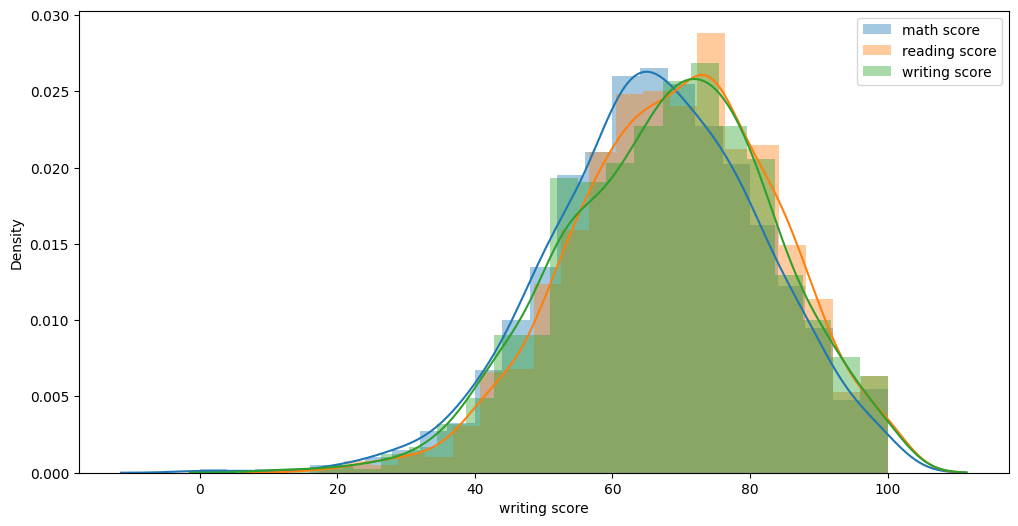

In [8]:
# compare histogram
plt.figure(figsize = (12,6))
sns.distplot(df['math score'], label = 'math score')
sns.distplot(df['reading score'], label = 'reading score')
sns.distplot(df['writing score'], label = 'writing score')
plt.legend()


# Hypothesis Testing

In [20]:
## In this step, we will test four different kinds of hypotheses using various techniques.
## In this entire analysis, our significance level is set to 0.05.
## It means that if, for a given hypothesis, the p-value is less than 0.05, then only we can reject the null hypothesis.

In [10]:
## Hypothesis 1: There is no significant difference between a student's performance in any skills - reading, writing, or math.
## Ho (NULL hypothesis) - There is no difference in the performance of students between math, reading, and writing skills.
## Ha (Alternative hypothesis) - There is a difference in the performance of students between math, reading, and writing skills.


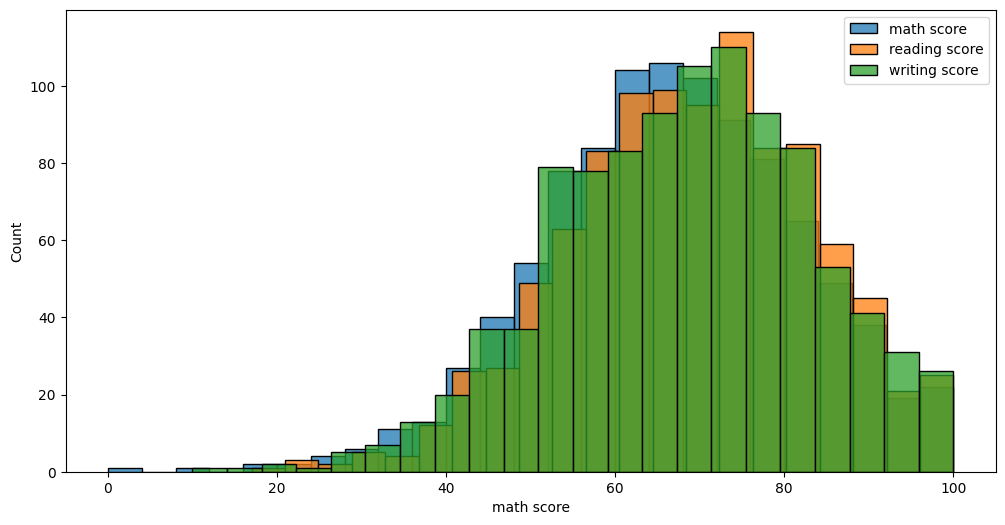

In [9]:
# compare histogram
plt.figure(figsize = (12,6))
sns.histplot(df['math score'], label = 'math score')
sns.histplot(df['reading score'], label = 'reading score')
sns.histplot(df['writing score'], label = 'writing score')
plt.legend()


In [11]:
# Applying one way ANOVA test
one_way_anova_test = f_oneway(df['reading score'], df['math score'], df['writing score'])
print(f"P-Value for One Way ANOVA Test is - {one_way_anova_test.pvalue}")


P-Value for One Way ANOVA Test is - 2.0701893192229333e-05


In [13]:
## Observed p-value in our hypothesis is 0.00207, which is very lower than the significance level.
## It means that there is a difference between the scores of each skill, and we can reject our null hypothesis.
## If the null hypothesis in the ANOVA test is rejected, then we conclude that at least one of the population means is different.
## However, it doesn’t give us an insight into which means are different.

In [14]:
## Hypothesis 2 - There is no relation between the gender of a student and their corresponding academic performance.
## Ho (NULL hypothesis) - There is no relation between the gender of a student and their corresponding academic performance.
## Ha (Alternative hypothesis) - There is a relation between the gender of a student and their corresponding academic performance.

In [15]:
# Create a new feature representing whether student passed or not
df['overall_performance'] = (df['reading score'] + df['writing score'] + df['math score'])/3
df['final_verdict'] = df['overall_performance'].apply(lambda i : 'Pass' if i >= 40 else 'Fail')

In [17]:
# create a contingency table based on the two categorical variables for the chi-square test.
contigency_table = pd.crosstab(df['gender'], df['final_verdict'], margins = True)
contigency_table

final_verdict,Fail,Pass,All
gender,,,
female,16,502,518
male,14,468,482
All,30,970,1000


In [18]:
# extract data for students of both genders
female_data = contigency_table.iloc[0, :].values[0 : 2].tolist()
male_data = contigency_table.iloc[1, :].values[0 : 2].tolist()


In [19]:
# apply chi-square test
chi_square_test = chi2_contingency([female_data, male_data])
print(f"P-Value for Chi Square Test is - {chi_square_test[1]}")

P-Value for Chi Square Test is - 1.0


In [21]:
## Since our observed p-value is less than the significance level, then we can’t reject our null hypothesis.
## There is a relation between the gender of a student and their corresponding academic performance.

In [26]:
## Hypothesis 3 - A random claim that students receive a mean score of 70 or more on average.
## Ho (NULL hypothesis) - The overall performance of students is greater than or equal to a score of 70.
## Ha (Alternative hypothesis) - The overall performance of students is less than 70.

<ipython-input-23-8440e44e8f6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['overall_performance'])


<Axes: xlabel='overall_performance', ylabel='Density'>

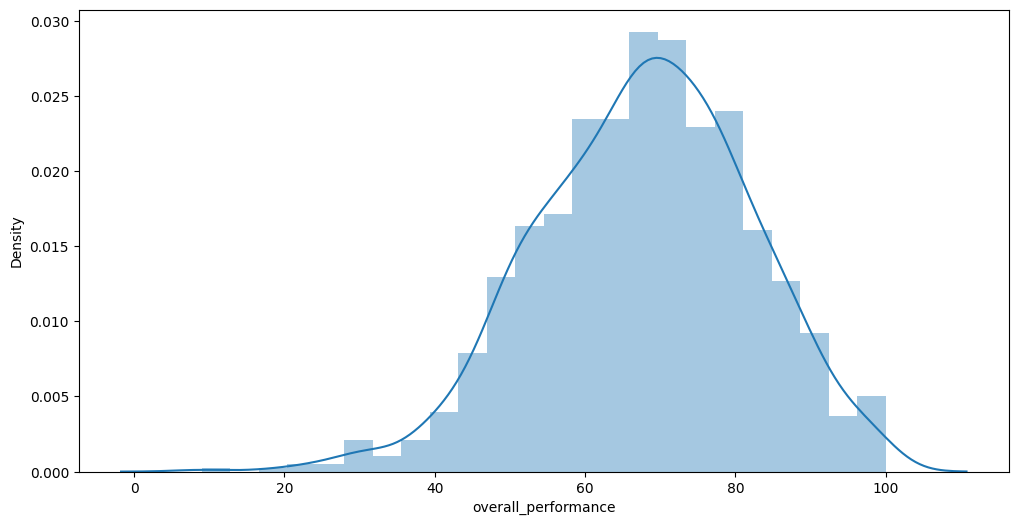

In [23]:
# Histogram of overall performance
plt.figure(figsize = (12,6))
sns.distplot(df['overall_performance'])



<Axes: xlabel='overall_performance', ylabel='Count'>

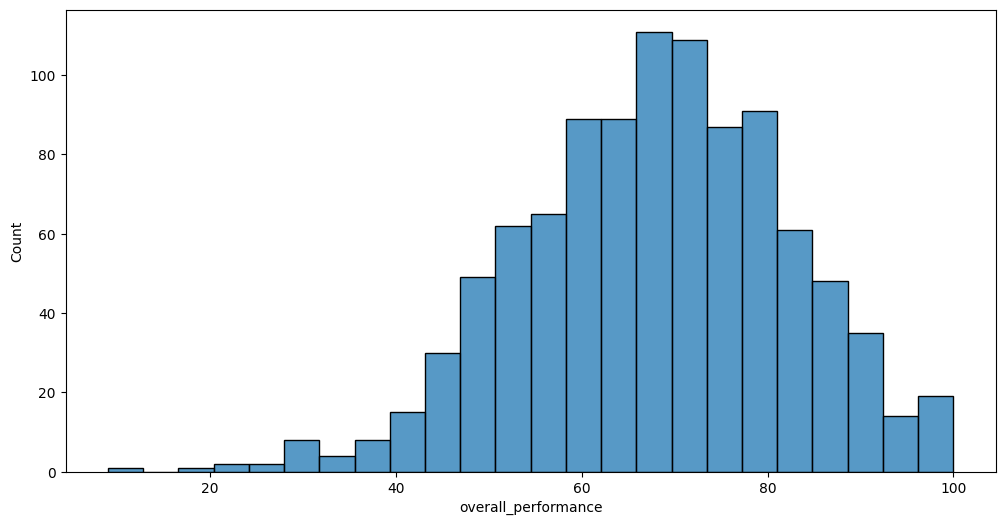

In [24]:
# Histogram of overall performance
plt.figure(figsize = (12,6))
sns.histplot(df['overall_performance'])



In [25]:
# apply one sample t-test on the sample overall performance
ttest_1samp(a = df['overall_performance'], popmean = 70)


TtestResult(statistic=-4.944665643928837, pvalue=8.942878479352005e-07, df=999)

In [33]:
## As the observed p-value is smaller than 0.05 (significance level),
## overall performance of students is less than 70.

In [28]:
## Hypothesis 4 - There is no significant difference in the mean math scores of students who have taken test preparation
## and those who have not taken any test preparation

In [29]:
## Ho (NULL hypothesis) - There is no difference in students' math scores, irrespective of whether they have taken test preparation.
## Ha (Alternative hypothesis) - There is a difference in students' math scores between those who have completed test preparation and those who have not.

In [30]:
# Explore mean of both samples
print('Mean Math Score of Students With Test Preparation is - {}'.format(df[df['test preparation course'] == 'completed']['math score'].mean()))
print('Mean Math Score of Students Without Test Preparation is - {}'.format(df[df['test preparation course'] == 'none']['math score'].mean()))


Mean Math Score of Students With Test Preparation is - 69.69553072625699
Mean Math Score of Students Without Test Preparation is - 64.0778816199377


In [31]:
# apply two sample t-test
ttest_ind(df[df['test preparation course'] == 'completed']['math score'], df[df['test preparation course'] == 'none']['math score'])


TtestResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08, df=998.0)

In [32]:
## As the observed p-value is smaller than 0.05 (significance level),
## Students who have completed prior test preparation perform better